# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.101250e+01     7.328924e+00
 * time: 0.00477290153503418
     1     2.821946e+01     4.264777e+00
 * time: 0.01373600959777832
     2     2.448630e+01     9.139670e+00
 * time: 0.036351919174194336
     3     1.397059e+01     2.896825e+00
 * time: 0.06371283531188965
     4     1.333733e+01     4.369636e+00
 * time: 0.08204078674316406
     5     1.277471e+01     1.974320e+00
 * time: 0.09925079345703125
     6     1.110736e+01     1.940247e+00
 * time: 0.11585879325866699
     7     1.039626e+01     1.759030e+00
 * time: 0.13306784629821777
     8     1.013945e+01     1.173169e+00
 * time: 0.14998292922973633
     9     9.956190e+00     9.817225e-01
 * time: 0.16788482666015625
    10     9.845618e+00     7.480555e-01
 * time: 0.18462181091308594
    11     9.729336e+00     5.411738e-01
 * time: 0.20140695571899414
    12     9.679787e+00     4.585994e-01
 * time: 0.2142930030822754
    13     9.619209e+00     3.660722e-01
 * time:

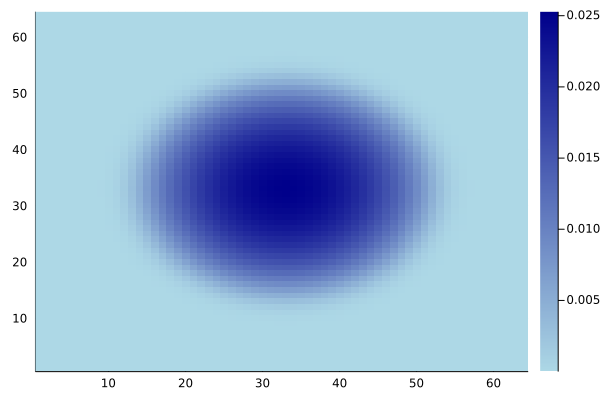

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)